In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
import matplotlib.pyplot as plt

from alp import const
from alp import plot_tools as pt
from alp.models import ALP


# LFC 

/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/matplotlib/contour.py:1364: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/matplotlib/contour.py:1365: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/numpy/ma/core.py:2846: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/mhostert/Repos/tau_LLPs/alp/plot_tools.py:1977: UserWarning: linewidths is ignored by contourf
  


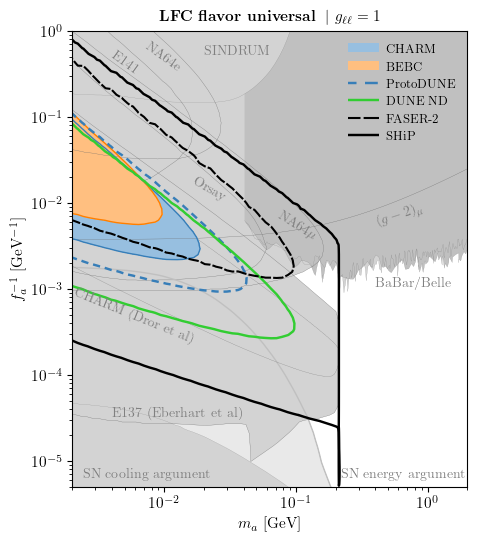

In [10]:
BP_NAME = 'LFC_universal_vMC'
c_lepton = np.diag([1, 1, 1])

fig, ax = pt.main_plot_LFC(BP_NAME, c_lepton, ymin=5e-6, ymax=1, xmin=2e-3, xmax=2, figsize=(5,6), loc='upper right', ncol=1, vlines=False, linewidth=0.1)


/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/matplotlib/contour.py:1364: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/matplotlib/contour.py:1365: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/numpy/ma/core.py:2846: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/mhostert/Repos/tau_LLPs/alp/plot_tools.py:1977: UserWarning: linewidths is ignored by contourf
  


(<Figure size 500x600 with 1 Axes>,
 <Axes: title={'center': '{\\bf LFC $\\tau$-philic} $\\,\\,\\vert\\,\\,$$g_{e e} = g_{\\mu \\mu} = 0$ $\\,\\,\\vert\\,\\,$ $g_{\\tau \\tau} = 1$'}, xlabel='$m_a$ [GeV]', ylabel='$f_a^{-1}$ [GeV$^{-1}$]'>)

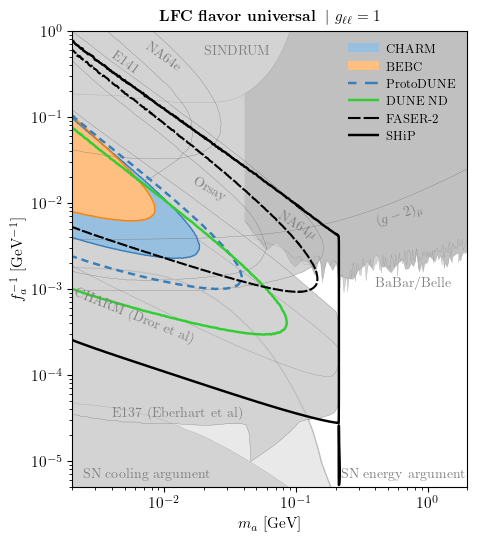

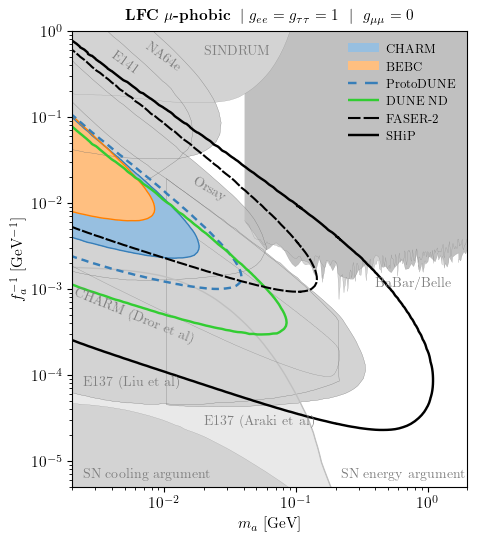

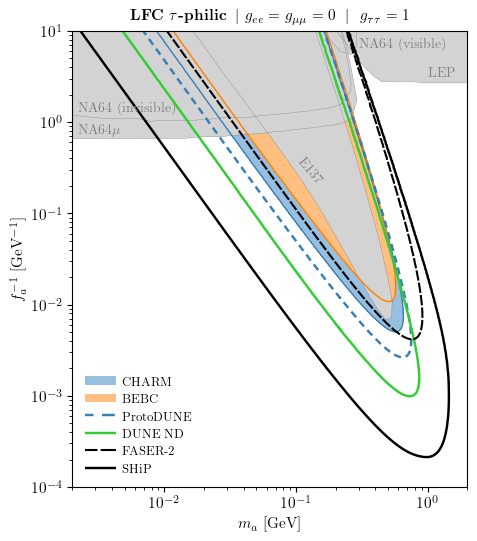

In [11]:
BP_NAME = 'LFC_universal'
c_lepton = np.diag([1, 1, 1])
pt.main_plot_LFC(BP_NAME, c_lepton, ymin=5e-6, ymax=1, xmin=2e-3, xmax=2, figsize=(5,6), loc='upper right', ncol=1, vlines=False, linewidth=0.1)

BP_NAME = 'LFC_etau'
c_lepton = np.diag([1, 0, 1])
pt.main_plot_LFC(BP_NAME, c_lepton, ymin=5e-6, ymax=1, xmin=2e-3, xmax=2, figsize=(5,6), loc='upper right', ncol=1, vlines=False, linewidth=0.1)


BP_NAME = 'LFC_tauphilic'
c_lepton = np.diag([0, 0, 1])
pt.main_plot_LFC(BP_NAME, c_lepton, ymin=1e-4, ymax=10, xmin=2e-3, xmax=2, figsize=(5,6), loc='lower left', ncol=1, vlines=False, linewidth=0.1)

## Exploring window above dimuon threshold

In [7]:
from alp import exp
from alp.exp_dicts import EXPERIMENTS

SPS_files = "tau_events/df_400GeV.parquet"  # In-house MC
SHIP = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS['SHiP'])

ma_vals= np.append(np.linspace(0.2, 0.22, 50), np.linspace(0.21, 0.212, 20))
rates = []
for ma in ma_vals:
    alp = ALP(ma, 4e4, c_lepton=np.diag([1,1,1]))
    rates.append(SHIP.get_event_rate(alp))
rates = np.array(rates)

KeyboardInterrupt: 

In [ ]:

rates = rates[np.argsort(ma_vals)]
ma_vals = ma_vals[np.argsort(ma_vals)]
fig, ax = pt.std_fig()
alps = ALP(ma_vals, 4e4, c_lepton=np.diag([1,1,1]))
ax.plot(1e3*(ma_vals - 2*const.m_mu), rates, color='steelblue')
ax2 = ax.twinx()
ax2.plot(1e3*(ma_vals - 2*const.m_mu), 1e-2*const.get_decay_rate_in_cm(alps.Gamma_a), color="firebrick", linestyle="--")
ax2.set_ylabel(r"$c \tau_a$/m", color="firebrick")
# plt.grid()
ax.set_yscale("log")
ax2.set_yscale("log")
# ax2.set_xscale("log")
ax.set_ylabel("Event rate", color="steelblue")
ax.set_xlabel("$(m_a - 2 m_\mu)$/MeV")
ax.set_title("SHiP event rate ($f_a = 10^{4}$ GeV)", fontsize=11)
ax.vlines(x=0, ymin=0, ymax=1e2, color="black", linestyle=(1,(5,1)), lw=0.5)
ax.set_xlim(-3, 3)
# ax.set_xlim(-10, 10)
fig.savefig("plots/ship_event_rate_around_threshold.pdf", bbox_inches='tight')

NameError: name 'rates' is not defined